In [1]:
import tensorflow as tf
import numpy as np
tf.__version__

'1.0.0'

In [2]:
a = tf.constant(3) # a rank 0 tensor: scalar, type=int32
a

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [3]:
b = tf.constant([1. ,2., 3.]) # a rank 1 tensor: vector with shape [3], type=float32
b

<tf.Tensor 'Const_1:0' shape=(3,) dtype=float32>

In [4]:
c = tf.constant([[1., 2., 3.], [4., 5., 6.]]) # a rank 2 tensor: a matrix with shape [2, 3]
c

<tf.Tensor 'Const_2:0' shape=(2, 3) dtype=float32>

Tensorflow에서 활용하는 변수 설정(상수로 설정하는 것이 비효율적이기 때문에 사용한다.)

In [5]:
newnode1 = tf.placeholder(tf.float32) #type=tf.float32인 placeholder newnode1 생성
newnode2 = tf.placeholder(tf.float32)
newnode3 = tf.add(newnode1, newnode2) #newnode1, newnode2의 합 newnode3 생성

In [6]:
sess = tf.Session() #computation 실행하기 위해 session 생성

In [7]:
print(sess.run(newnode3, feed_dict={newnode1: 3, newnode2: 4})) # feed-dict로 newnode1, newnode2 값 지정, newnode3 실행
print(sess.run(newnode3, feed_dict={newnode1: [1,3], newnode2: [2,4]})) # 이렇게 여러값도 대입 가능

7.0
[ 3.  7.]


Tensorflow를 활용한 최적 선형회귀

In [8]:
vectors_set = [] #좌표벡터를 저장할 빈 list 생성

for i in range(1000): #1000개의 random (x,y) 생성
    x1 = np.random.normal(0,1) #평균=0, 표준편차=1인 정규난수 발생
    y1 = 0.1*x1 + 0.3 + np.random.normal(0,0.05) #y = 0.1*x + 0.3 + error
    vectors_set.append([x1,y1]) #vectors_set에 [x1,y1]를 list 형태로 추가

In [9]:
vectors_set #(x,y)로 이루어진 데이터 생성

[[-1.8014466883923703, 0.12851255564318698],
 [0.7017932576333773, 0.32588820594742407],
 [0.9482331451552796, 0.42309047730146593],
 [-0.5470624556289958, 0.2901331636882174],
 [0.321895621874781, 0.26393603184283104],
 [1.8255272169643613, 0.46655799091142175],
 [-0.8597467224287216, 0.08957607577578611],
 [-0.2620712991771379, 0.33418664633010176],
 [-0.7033141749102106, 0.2141892699935371],
 [0.1400428901740419, 0.2880577459840564],
 [0.6381322986388109, 0.3424285728585893],
 [0.5392784180766601, 0.36750251705804193],
 [0.09357981584480417, 0.3803709680550751],
 [0.7153888891841244, 0.4416371194894068],
 [0.9029497754235724, 0.3376831182588079],
 [-2.5414426006300714, 0.06245007114612437],
 [0.7535129524345117, 0.29617945299585924],
 [0.16016159327854243, 0.3341726923173189],
 [-0.11307397366652225, 0.2976076465134898],
 [0.4882632963144909, 0.24205772962460032],
 [-0.07734527225255029, 0.23984820688466443],
 [0.6485526260665926, 0.37398473157925194],
 [-0.2931243670128137, 0.22138

In [10]:
x_data = [v[0] for v in vectors_set] #vectors_set에 존재하는 모든 v에 대해 각 v의 첫번째 원소 x_data에 저장
y_data = [v[1] for v in vectors_set] #vectors_set에 존재하는 모든 v에 대해 각 v의 두번째 원소 y_data에 저장

In [11]:
import matplotlib.pyplot as plt #plot을 그리기위한 라이브러리 matplotlib.pyplot import
%matplotlib inline

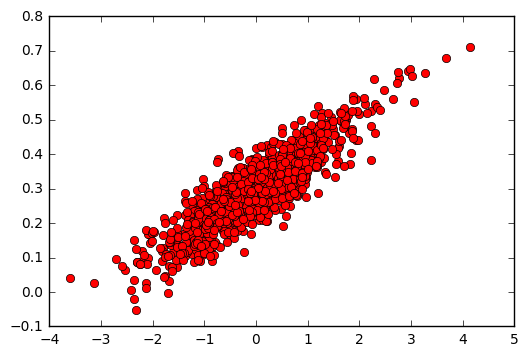

In [12]:
plt.plot(x_data, y_data, 'ro') #x_data, y_data의 산점도를 점('ro')으로 나타낸 plot
plt.show() #선형관계 확인 가능

In [13]:
W = tf.Variable(tf.random_uniform([1], -1, 1)) #-1~1의 uniform 분포에서 1개를 random 추출한 variable node W 생성
b = tf.Variable(tf.zeros([1])) #b=0 가정
y = W*x_data + b #Linear Regression Line Hypothesis 정의

In [14]:
loss = tf.reduce_mean(tf.square(y - y_data)) #loss 함수 = 오차제곱합의 평균(MSE평균)

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5) #optimizer 정의: learning_rate=0.5인 GradientDescentOptimizer
train = optimizer.minimize(loss) #optimizer를 활용하여 loss를 minimize 하는 train 노드 생성

In [16]:
sess = tf.Session() #graph 실행을 위한 session 생성
sess.run(tf.global_variables_initializer()) #variable 초기화: variable 실행하기전 필수로 실행

0 [ 0.01430082] [ 0.]
0 0.0985243


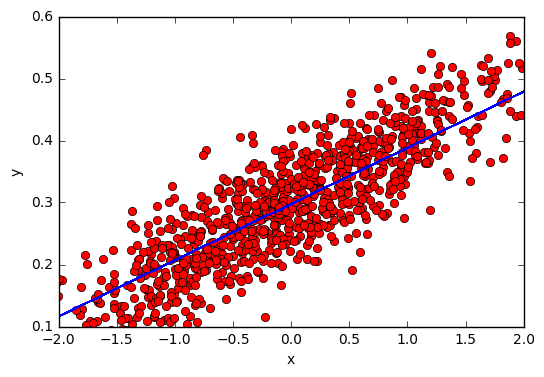

1 [ 0.09064876] [ 0.29752961]
1 0.00278305


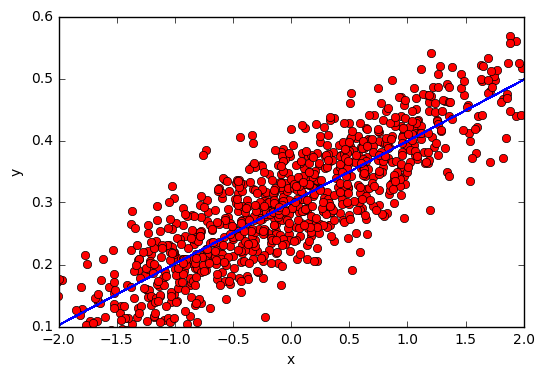

2 [ 0.09891473] [ 0.30007488]
2 0.00270832


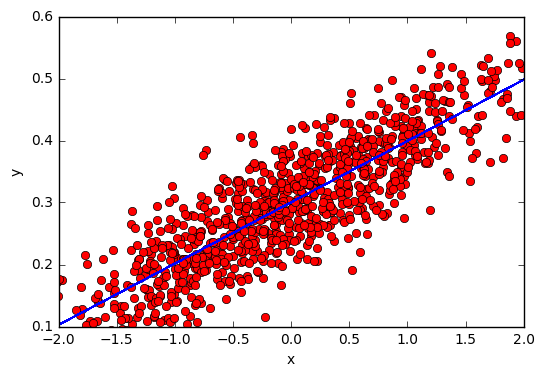

3 [ 0.09882063] [ 0.30035043]
3 0.00270824


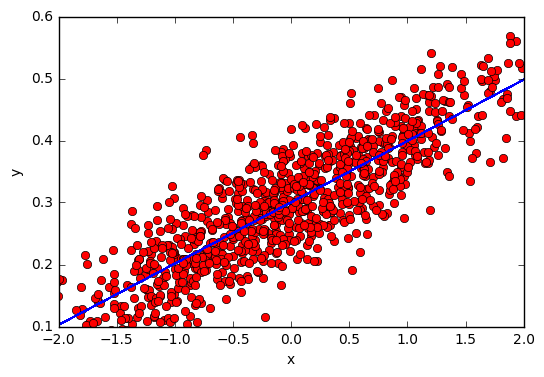

4 [ 0.09883185] [ 0.3003473]
4 0.00270824


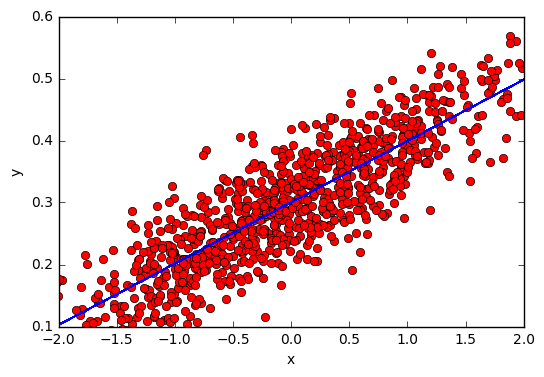

5 [ 0.0988315] [ 0.30034769]
5 0.00270824


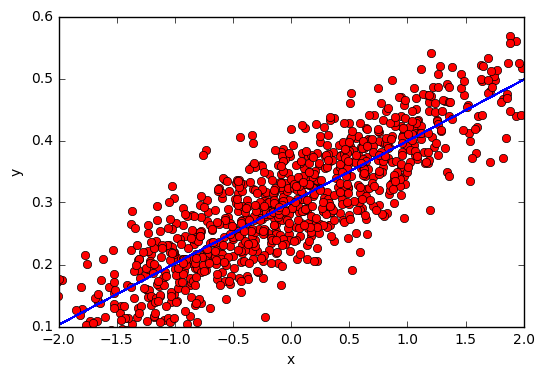

6 [ 0.09883152] [ 0.30034766]
6 0.00270824


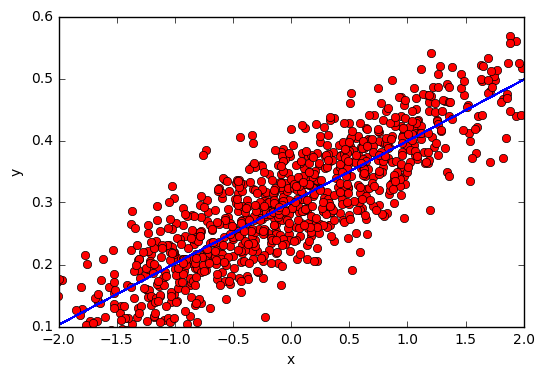

7 [ 0.09883152] [ 0.30034766]
7 0.00270824


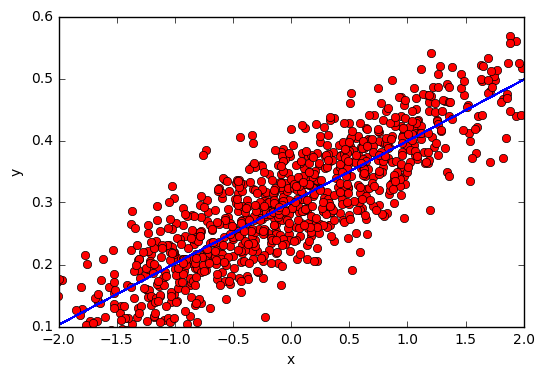

8 [ 0.09883152] [ 0.30034766]
8 0.00270824


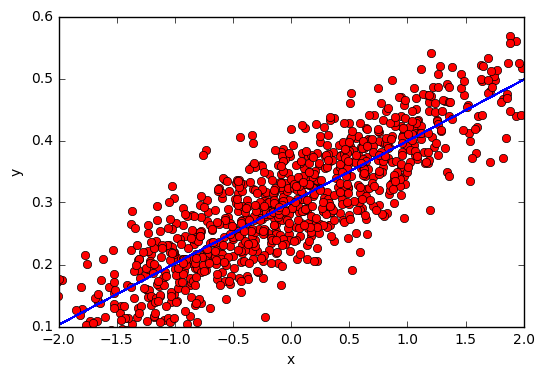

9 [ 0.09883152] [ 0.30034766]
9 0.00270824


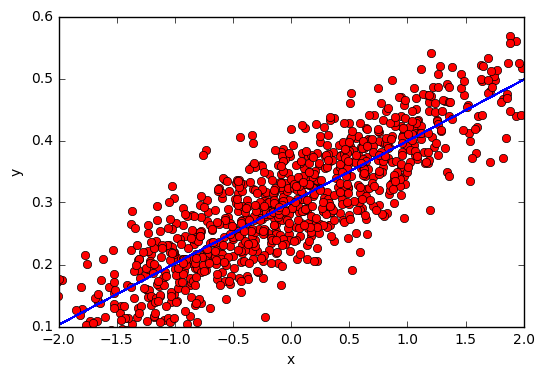

In [17]:
for step in range(10): 
    print(step, sess.run(W),sess.run(b)) #(step, W, b) 출력 (0.1,0.3)에 점점 가까워져야함
    print(step, sess.run(loss)) #(step, loss) 출력
    sess.run(train) #loss 함수 optimize 실행
    
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data,sess.run(W)*x_data + sess.run(b))
    plt.xlabel('x')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('y')
    plt.show()